<h1>Installing Streamlit</h1>



In [90]:
#!pip install -r requirements.txt

In [2]:
!pip install streamlit

<h1>Importing the packages</h1>



In [1]:
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

<h1>Loading the data</h1>



In [3]:
path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
df = pd.read_csv(path,header=0)
print(df.shape)
print(df.head)

(108, 2)
<bound method NDFrame.head of        Month  Sales
0    1960-01   6550
1    1960-02   8728
2    1960-03  12026
3    1960-04  14395
4    1960-05  14587
..       ...    ...
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577

[108 rows x 2 columns]>


<h1>Exploring the given dataset</h1>



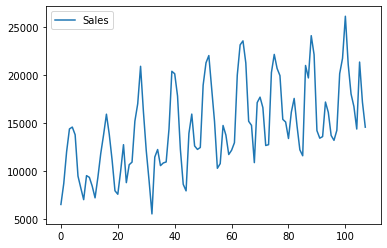

In [4]:
df.plot()
plt.show()

<h1>Renaming The Columns</h1>



In [5]:
df.columns = ['ds','y']
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


<h1>Summarizing the data points</h1>



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      108 non-null    object
 1   y       108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


<h1>Converting Date from text to Datetime object</h1>



In [7]:
df['ds'] = pd.to_datetime(df['ds'])
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


<h1>Exploring the datset after conversion</h1>



In [8]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


<h1>Model Initialization and Fitting</h1>



In [9]:
model = Prophet()

In [10]:
model.fit(df)

2021-12-15 12:10:17.399 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
2021-12-15 12:10:17.406 INFO    fbprophet: Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2021-12-15 12:10:17.408 INFO    fbprophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.39613


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       270.098    0.00261938       60.3554      0.3175           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       270.275   7.23167e-05       79.5051   8.367e-07       0.001      262  LS failed, Hessian reset 
     199       270.292   2.73653e-06       94.8664      0.1454      0.6833      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       270.293   1.69172e-08        77.993           1           1      333   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<h1>Testing the Model with known data</h1>



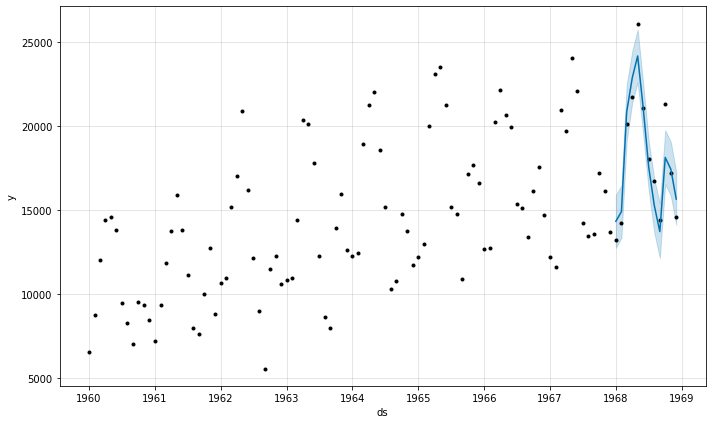

In [12]:
future = list()
for i in range(1,13):
  date = '1968-%02d' % i
  future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)
model.plot(forecast)
plt.show()

<h1>Forecasting</h1>



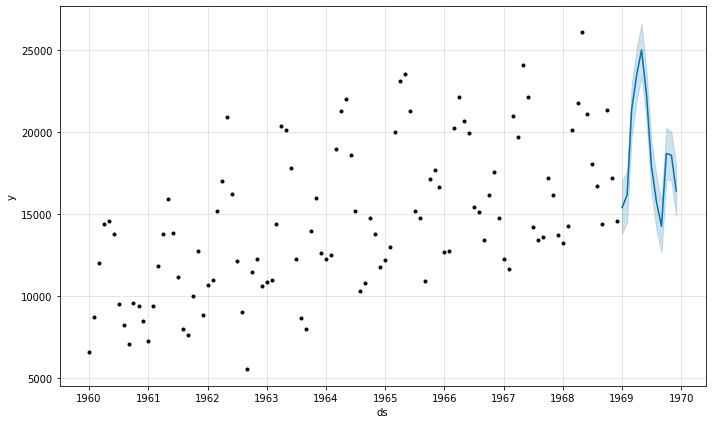

In [83]:
future = list()
for i in range(1,13):
  date = '1969-%02d' % i
  future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)
model.plot(forecast)
plt.show()

<h1>Creating dataset for Training</h1>



In [84]:
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


<h1>Estimating Accuracy of the model</h1>



In [85]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true,y_pred)
print("MAE: %3f " %mae)

MAE: 1369.485336 


<h1>Visualizing the results comparatively</h1>



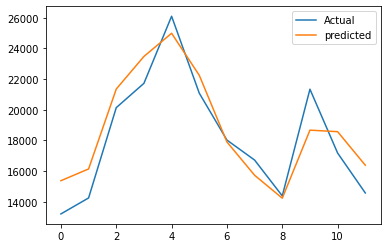

In [86]:
plt.plot(y_true,label='Actual')
plt.plot(y_pred,label='predicted')
plt.legend()
plt.show()

<h1>Trining the model</h1>



In [87]:
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import joblib

path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
df = pd.read_csv(path,header=0)

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
train = df.drop(df.index[-12:])

model = Prophet()
model.fit(train)
filename = 'model.sav'
joblib.dump(model,filename)



2021-12-15 13:34:03.858 Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2021-12-15 13:34:03.862 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -104.85
Iteration  1. Log joint probability =    72.7915. Improved by 177.641.
Iteration  2. Log joint probability =     141.49. Improved by 68.6982.
Iteration  3. Log joint probability =    148.523. Improved by 7.03351.
Iteration  4. Log joint probability =    148.546. Improved by 0.0223531.
Iteration  5. Log joint probability =    148.554. Improved by 0.00880483.
Iteration  6. Log joint probability =    148.576. Improved by 0.0214036.
Iteration  7. Log joint probability =    148.585. Improved by 0.00973269.
Iteration  8. Log joint probability =    148.606. Improved by 0.0204538.
Iteration  9. Log joint probability =    148.617. Improved by 0.0106609.
Iteration 10. Log joint probability =    148.636. Improved by 0.0195037.
Iteration 11. Log joint probability =    148.648. Improved by 0.0115894.
Iteration 12. Log joint probability =    148.666. Improved by 0.0185532.
Iteration 13. Log joint probability =    148.679. Improved by 0.0125183.
Iteration 14. 

['model.sav']

# Results

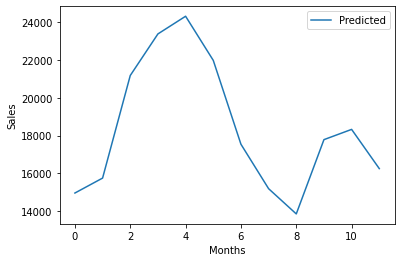

In [88]:
future = list()
for i in range(1,13):
  date = '1969-%02d' % i
  future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

loaded_model = joblib.load(filename)
forecast = loaded_model.predict(future)
y_pred = forecast['yhat'].values
plt.plot(y_pred, label='Predicted')
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend()
plt.show()

<h1>App</h1>

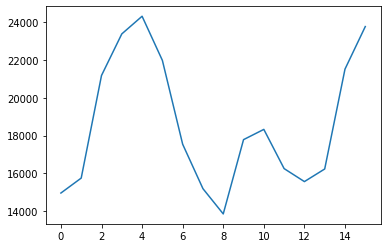

In [82]:
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import streamlit as st
import asyncio
import nest_asyncio
asyncio.set_event_loop(asyncio.SelectorEventLoop())

class StreamlitApp:
  def __init__(self):
    self.filename = 'model.sav'
    self.model = joblib.load(self.filename)

  def train_model():
    path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
    df = pd.read_csv(path,header=0)

    df.columns = ['ds','y']
    df['ds'] = pd.to_datetime(df['ds'])
    train = df.drop(df.index[-12:])

    model = Prophet()
    model.fit(train)
    filename = 'model.sav'
    joblib.dump(model,filename)


  def predict_sales(self):
    future = list()
    n=int(st.slider('Months:',1,36,16))
    count = 0
    y,m = divmod(n,12)
    for i in range(0,y+1):
        if m>=0:
          for j in range(1,13):
            if count<n :
              date = str(1969+i)+'-'+str("%02d"%j)
              count+=1
              future.append([date])
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds'] = pd.to_datetime(future['ds'])
        
    forecast = self.model.predict(future)
    y_pred = forecast['yhat'].values
    fig, ax = plt.subplots()
    ax.plot(y_pred, label='Predicted')


sa =StreamlitApp()
sa.predict_sales()

In [89]:
#!streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py
